In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import impt
import jax
import fitsio
import numpy as np
import jax.numpy as jnp
from fpfs import pltutil
import matplotlib.pylab as plt
from configparser import ConfigParser

import matplotlib as mpl
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]

In [2]:
cparser = ConfigParser()
cparser.read('./config_n1_p1_3.ini')
sum_dir = cparser.get("procsim", "sum_dir")
cat_dir = cparser.get("procsim", "cat_dir")
shear = cparser.getfloat("distortion", "shear_value")

covmat = pyfits.getdata(os.path.join(cat_dir, 'cov_matrix.fits'))
nstd = np.sqrt(np.diag(covmat))[0]

xx = []
mbias = []
merr =  []
cbias = []
cerr = []
print(sum_dir)
for mag in [24, 24.5, 25, 25.5, 26.0, 26.5, 27.0, 27.5]:
    fname = "%s/bin_%.1f_2.fits" % (sum_dir, mag)
    if not os.path.isfile(fname):
        continue
    snr = 10**((30-mag)/2.5) / nstd
    xx.append(snr)
    print("magnitude is: %.1f" % mag)
    a = pyfits.getdata(fname)
    a = a[np.argsort(a[:, 0])]
    nsim = a.shape[0]
    msk = np.isnan(a[:, 3])
    b = np.average(a, axis=0)
    c = np.std(a, axis=0)
    p = 99.7
    p2 = (100 - p) / 2.0
    p3 = p + p2
    mbias.append(b[1] / b[3] / shear / 2.0 - 1)
    merr.append(np.std(a[:, 1]) / b[3] / np.sqrt(nsim) / shear / 2.0)
    cbias.append(b[2] / b[3])
    cerr.append(np.std(a[:, 2]) / b[3] / np.sqrt(nsim))
    #print(b[1] / b[3] / shear / 2.0 - 1, np.std(a[:, 1]) / b[3] / np.sqrt(nsim) / shear / 2.0)
    #print(b[2] / b[3], np.std(a[:, 2]) / b[3] / np.sqrt(nsim))
xx = np.array(xx)
mbias = np.array(mbias)
merr = np.array(merr)
cbias = np.array(cbias)
cerr = np.array(cerr)
print(mbias)

sum_n1_p1_3
magnitude is: 26.0
magnitude is: 26.5
magnitude is: 27.0
magnitude is: 27.5
[ 0.00041249  0.00074282  0.00040713 -0.00070409]


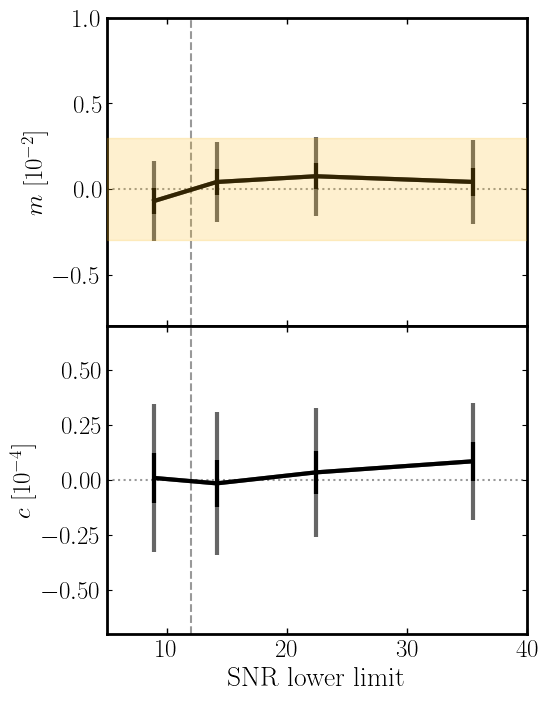

In [127]:
plt.close()
fig,axes= plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(6,8))
ax=axes[0]

ax.errorbar(xx,mbias*1e2,merr*1e2,color='black')
ax.errorbar(xx,mbias*1e2,merr*1e2*3.,color='black', alpha=0.6)

ax.set_ylabel('$m$ $[10^{-2}]$',fontsize=18)
ax.set_ylim(-0.8,1.)
ax.axhspan(-0.3,0.3,0,100,color='#FDB813',alpha=0.2, zorder=50)
ax.axvline(x = 12, color = 'black', ls='--', lw=1.5, alpha=0.4)
ax.axhline(0, color = 'black', ls=':', lw=1.5, alpha=0.4)

ax=axes[1]
ax.errorbar(xx,cbias*1e4,cerr*1e4,color='black')
ax.errorbar(xx,cbias*1e4,cerr*1e4*3.,color='black', alpha=0.6)
ax.set_ylabel('$c$ $[10^{-4}]$',fontsize=18)
ax.set_xlim(5,40)
ax.set_ylim(-0.7,0.7)
ax.set_xlabel('SNR lower limit')
ax.axvline(x = 12, color = 'black', ls='--', lw=1.5, alpha=0.4)
ax.axhline(0, color = 'black', ls=':', lw=1.5, alpha=0.4)
fig.subplots_adjust(hspace=0, left=0.2)
fig.show()
fig.savefig('./plots/fpfs_ext_mc.pdf')

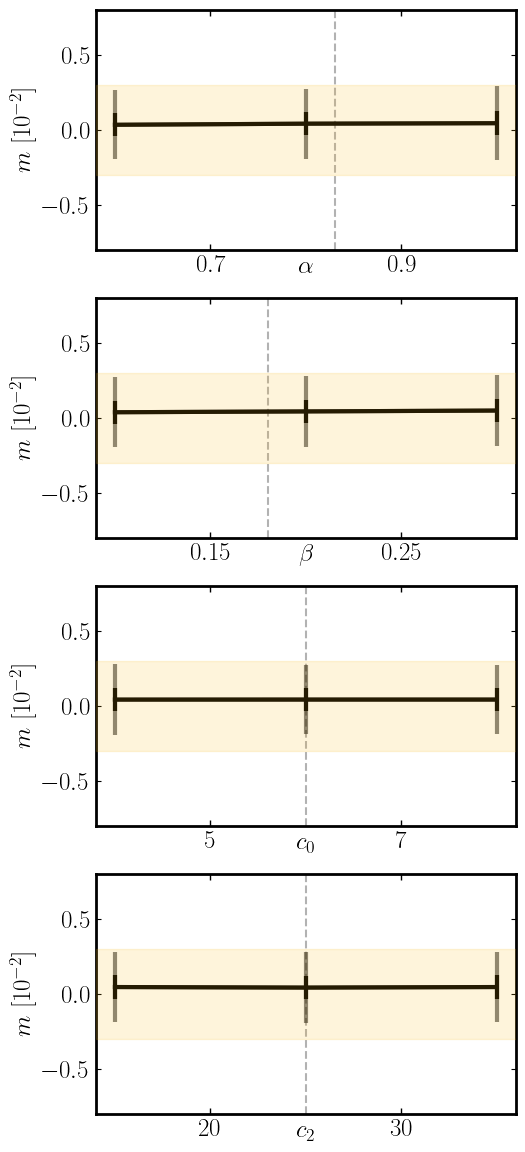

In [116]:
cparser = ConfigParser()
cparser.read('./config_n1_p1_3.ini')
shear = cparser.getfloat("distortion", "shear_value")

plt.close()
fig,axes= plt.subplots(nrows=4, ncols=1, figsize=(6,12))

ax=axes[0]
mbias = []
merr = []
xx = np.array([0.6, 0.8, 1.0])
for i in range(1,4):
    #fname = '/lustre/work/xiangchong.li/work/FPFS2/descwl-shear-fpfs/tests/test4_final/test_alpha/sum_%d/bin_27.0.fits' % i
    fname = './sum_n1_p1_3/test_alpha/sum_%d/bin_27.0_2.fits' % i
    a = pyfits.getdata(fname)
    a = a[np.argsort(a[:, 0])]
    nsim = a.shape[0]
    msk = np.isnan(a[:, 3])
    b = np.average(a, axis=0)
    mbias.append(b[1] / b[3] / shear / 2.0 - 1)
    merr.append(np.std(a[:, 1]) / b[3] / np.sqrt(nsim) / shear / 2.0)
mbias = np.array(mbias)
merr = np.array(merr)

ax.errorbar(xx,mbias*1e2,merr*1e2,color='black')
ax.errorbar(xx,mbias*1e2,merr*1e2*3.,color='black', alpha=0.5)
ax.set_ylabel(r'$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlabel(r'$\alpha$',fontsize=18, labelpad=-15)
ax.set_ylim(-0.8,0.8)
ax.axhspan(-0.3,0.3,0,100,color='#FDB813',alpha=0.15, zorder=50)
ax.axvline(0.83, color='black', ls='--', lw=1.5, alpha=0.3)
ax.set_xticks((0.7, 0.9))


ax=axes[1]
mbias = []
merr = []
xx = np.array([0.1, 0.2, 0.3])
for i in range(1,4):
    #fname = '/lustre/work/xiangchong.li/work/FPFS2/descwl-shear-fpfs/tests/test4_final/test_beta/sum_%d/bin_27.0.fits' % i
    fname = './sum_n1_p1_3/test_beta/sum_%d/bin_27.0_2.fits' % i
    a = pyfits.getdata(fname)
    a = a[np.argsort(a[:, 0])]
    nsim = a.shape[0]
    msk = np.isnan(a[:, 3])
    b = np.average(a, axis=0)
    mbias.append(b[1] / b[3] / shear / 2.0 - 1)
    merr.append(np.std(a[:, 1]) / b[3] / np.sqrt(nsim) / shear / 2.0)
mbias = np.array(mbias)
merr = np.array(merr)

ax.errorbar(xx,mbias*1e2,merr*1e2,color='black')
ax.errorbar(xx,mbias*1e2,merr*1e2*3.,color='black', alpha=0.5)
ax.set_ylabel(r'$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlabel(r'$\beta$',fontsize=18, labelpad=-15)
ax.set_ylim(-0.8,0.8)
ax.axhspan(-0.3,0.3,0,100,color='#FDB813',alpha=0.15, zorder=50)
ax.set_xticks((0.15, 0.25))
ax.axvline(0.18, color='black', ls='--', lw=1.5, alpha=0.3)

ax=axes[2]
mbias = []
merr = []
xx = np.array([4.0, 6.0, 8.0])
for i in range(1,4):
    #fname = '/lustre/work/xiangchong.li/work/FPFS2/descwl-shear-fpfs/tests/test4_final/test_c0/sum_%d/bin_27.0.fits' % i
    fname = './sum_n1_p1_3/test_c0/sum_%d/bin_27.0_2.fits' % i
    a = pyfits.getdata(fname)
    a = a[np.argsort(a[:, 0])]
    nsim = a.shape[0]
    msk = np.isnan(a[:, 3])
    b = np.average(a, axis=0)
    mbias.append(b[1] / b[3] / shear / 2.0 - 1)
    merr.append(np.std(a[:, 1]) / b[3] / np.sqrt(nsim) / shear / 2.0)
mbias = np.array(mbias)
merr = np.array(merr)

ax.errorbar(xx,mbias*1e2,merr*1e2,color='black')
ax.errorbar(xx,mbias*1e2,merr*1e2*3.,color='black', alpha=0.5)
ax.set_ylabel(r'$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlabel(r'$c_0$',fontsize=18, labelpad=-15)
ax.set_ylim(-0.8,0.8)
ax.axhspan(-0.3,0.3,0,100,color='#FDB813',alpha=0.15, zorder=50)
ax.set_xticks((5, 7))
ax.axvline(6, color='black', ls='--', lw=1.5, alpha=0.3)


ax=axes[3]
mbias = []
merr = []
xx = np.array([15, 25, 35])
for i in range(1,4):
    #fname = '/lustre/work/xiangchong.li/work/FPFS2/descwl-shear-fpfs/tests/test4_final/test_c2/sum_%d/bin_27.0.fits' % i
    fname = './sum_n1_p1_3/test_c2/sum_%d/bin_27.0_2.fits' % i
    a = pyfits.getdata(fname)
    a = a[np.argsort(a[:, 0])]
    nsim = a.shape[0]
    msk = np.isnan(a[:, 3])
    b = np.average(a, axis=0)
    mbias.append(b[1] / b[3] / shear / 2.0 - 1)
    merr.append(np.std(a[:, 1]) / b[3] / np.sqrt(nsim) / shear / 2.0)
mbias = np.array(mbias)
merr = np.array(merr)

ax.errorbar(xx,mbias*1e2,merr*1e2,color='black')
ax.errorbar(xx,mbias*1e2,merr*1e2*3.,color='black', alpha=0.5)
ax.set_ylabel(r'$m$ $[10^{-2}]$',fontsize=18)
ax.set_xlabel(r'$c_2$',fontsize=18, labelpad=-15)
ax.set_ylim(-0.8,0.8)
ax.axhspan(-0.3,0.3,0,100,color='#FDB813',alpha=0.15, zorder=50)
ax.set_xticks((20, 30))
ax.axvline(25, color='black', ls='--', lw=1.5, alpha=0.3)

fig.subplots_adjust(left=0.2, bottom=0.03, top=0.95)
fig.savefig('./plots/fpfs_ext_abc0c2.pdf')

0.0025872827113594555
1.0 31.428571428571427 23.616496521295193
(225,)


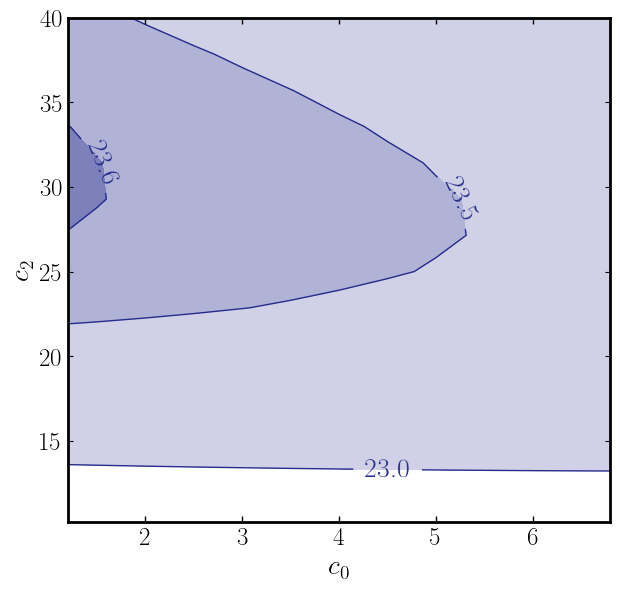

In [44]:
fontsize = 20
res=pyfits.getdata('sum_n1_p1_2/1_2_lrange.fits')
x=res[1]
y=res[2]
z=res[-1]
print(np.min(z))
z=(0.26/(np.sqrt((0.2*7000/60/2.)**2.*np.pi)*z))**2.
ind=np.argmax(z)
print(x[ind], y[ind], z[ind])
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
def get_paler_colors(color, num, pale_factor=None):
    # convert a color into an array of colors for used in contours
    color = mpl.colors.colorConverter.to_rgb(color)
    pale_factor = pale_factor or 0.4
    cols = [color]
    for _ in range(1, num):
        cols = [set([c * (1 - pale_factor) + pale_factor for c in cols[0]])] + cols
    return cols
levels = [23, 23.5, 23.6, 24]
colors = get_paler_colors(color, len(levels))
plt.close()
fig,ax= plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,6))
x_centers, y_centers = np.unique(x),np.unique(y)
print(z.shape)
values = z.reshape((15,15))
ax.contourf(x_centers, y_centers, values, levels=levels, colors=colors, zorder=1)
con = ax.contour(
    x_centers, y_centers,
    values, levels=levels,
    colors=color, linestyles='-',
    linewidths=1.0, zorder=1,
)
fmt = dict([(l, "%.1f" % (l)) for l in levels])
ax.clabel(con, levels, inline=True, fmt=fmt, fontsize=20)
ax.set_xlabel(r'$c_0$')
ax.set_ylabel(r'$c_2$')
ax.set_xlim(1.2, 6.8)
ax.set_ylim(10.2, 40)
fig.subplots_adjust(top=0.95)
#fig.savefig('./plots/neff_c0c2.pdf')

0.0025254983954735954
6.0 25.0 24.786148659567285


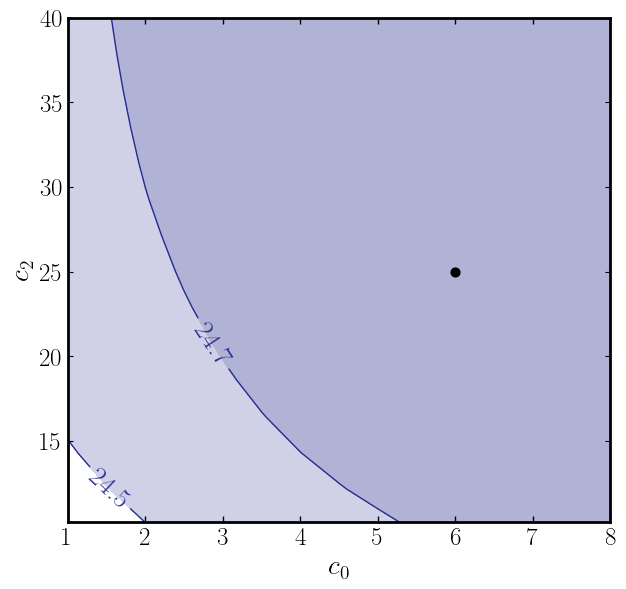

In [64]:
fontsize = 20
res=pyfits.getdata('sum_n1_p1_2/1_2_lrange_g15.fits')
x=res[1]
y=res[2]
z=res[-1]
print(np.min(z))
z=(0.26/(np.sqrt((0.2*7000/60/2.)**2.*np.pi)*z))**2.
ind=np.argmax(z)
print(x[ind], y[ind], z[ind])
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
def get_paler_colors(color, num, pale_factor=None):
    # convert a color into an array of colors for used in contours
    color = mpl.colors.colorConverter.to_rgb(color)
    pale_factor = pale_factor or 0.4
    cols = [color]
    for _ in range(1, num):
        cols = [set([c * (1 - pale_factor) + pale_factor for c in cols[0]])] + cols
    return cols
levels = [24.5, 24.7, 24.8, 26]
colors = get_paler_colors(color, len(levels))
plt.close()
fig,ax= plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,6))
x_centers, y_centers = np.unique(x),np.unique(y)
nn = int(np.sqrt(float(z.shape[0])))
values = z.reshape((nn,nn))
ax.contourf(x_centers, y_centers, values, levels=levels, colors=colors, zorder=1)
ax.scatter(x[ind], y[ind], s=40, color='black')
con = ax.contour(
    x_centers, y_centers,
    values, levels=levels,
    colors=color, linestyles='-',
    linewidths=1.0, zorder=1,
)
fmt = dict([(l, "%.1f" % (l)) for l in levels])
ax.clabel(con, levels, inline=True, fmt=fmt, fontsize=20)
ax.set_xlabel(r'$c_0$')
ax.set_ylabel(r'$c_2$')
ax.set_ylim(10.2, 40)
fig.subplots_adjust(top=0.95)
fig.savefig('./plots/neff_c0c2.pdf')

0.5285714285714286 0.7 24.117171585349805


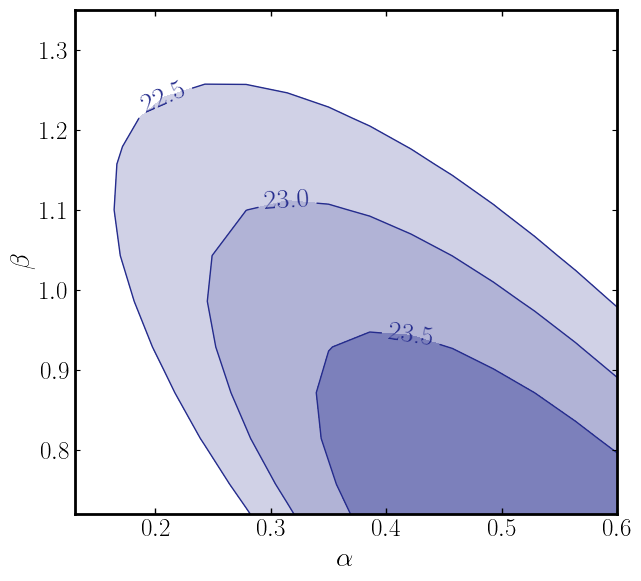

In [43]:
res=pyfits.getdata('sum_n1_p1_2/3_4_lrange.fits')
x=res[3]
y=res[4]
z=res[-1]
z=(0.26/(np.sqrt((0.2*7000/60/2.)**2.*np.pi)*z))**2.
ind=np.argmax(z)
print(x[ind], y[ind], z[ind])
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
def get_paler_colors(color, num, pale_factor=None):
    # convert a color into an array of colors for used in contours
    color = mpl.colors.colorConverter.to_rgb(color)
    pale_factor = pale_factor or 0.4
    cols = [color]
    for _ in range(1, num):
        cols = [set([c * (1 - pale_factor) + pale_factor for c in cols[0]])] + cols
    return cols
levels = [22.5, 23, 23.5, 25]
colors = get_paler_colors(color, len(levels))
plt.close()
fig,ax= plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,6))
x_centers, y_centers = np.unique(x),np.unique(y)
nn = int(np.sqrt(float(z.shape[0])))
values = z.reshape((nn,nn))
ax.contourf(x_centers, y_centers, values, levels=levels, colors=colors, zorder=1)
con = ax.contour(
    x_centers, y_centers,
    values, levels=levels,
    colors=color, linestyles='-',
    linewidths=1.0, zorder=1,
)

fmt = dict([(l, "%.1f" % (l)) for l in levels])
ax.clabel(con, levels, inline=True, fmt=fmt, fontsize=20)
ax.set_xlabel(r'$\alpha$')
ax.set_ylim(0.72, 1.35)
ax.set_xlim(0.13, 0.6)
ax.set_ylabel(r'$\beta$')
fig.subplots_adjust(top=0.95)
#fig.savefig('./plots/neff_ab.pdf')

In [3]:
ls sum_n1_p1_2

1_2.fits         3_4_lrange.fits      bin_26.5.fits  snrcuts.fits
1_2_lrange.fits  3_4_lrange_g25.fits  bin_27.0.fits
3_4.fits         bin_26.0.fits        bin_27.5.fits


0.8263157894736843 0.17894736842105263 24.695670770341472


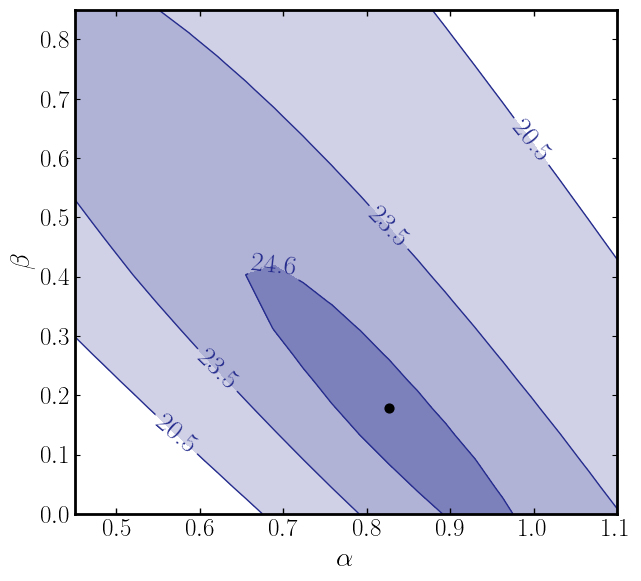

In [88]:
res=pyfits.getdata('sum_n1_p1_2/3_4_lrange_g20.fits')
x=res[3]
y=res[4]
z=res[-1]
z=(0.26/(np.sqrt((0.2*7000/60/2.)**2.*np.pi)*z))**2.
ind=np.argmax(z)
print(x[ind], y[ind], z[ind])
color = plt.rcParams['axes.prop_cycle'].by_key()['color'][0]
def get_paler_colors(color, num, pale_factor=None):
    # convert a color into an array of colors for used in contours
    color = mpl.colors.colorConverter.to_rgb(color)
    pale_factor = pale_factor or 0.4
    cols = [color]
    for _ in range(1, num):
        cols = [set([c * (1 - pale_factor) + pale_factor for c in cols[0]])] + cols
    return cols
levels = [20.5, 23.5, 24.55, 26]
colors = get_paler_colors(color, len(levels))
plt.close()
fig,ax= plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(7,6))
x_centers, y_centers = np.unique(x),np.unique(y)
nn = int(np.sqrt(float(z.shape[0])))
values = z.reshape((nn,nn))
ax.contourf(x_centers, y_centers, values, levels=levels, colors=colors, zorder=1)
con = ax.contour(
    x_centers, y_centers,
    values, levels=levels,
    colors=color, linestyles='-',
    linewidths=1.0, zorder=1,
)

fmt = dict([(l, "%.1f" % (l)) for l in levels])
ax.clabel(con, levels, inline=True, fmt=fmt, fontsize=20)
ax.set_xlabel(r'$\alpha$')
ax.scatter(x[ind], y[ind], s=40, color='black')
#ax.set_ylim(0.72, 1.35)
#ax.set_xlim(0.13, 0.6)
#x=np.linspace(0.6,1.1, 100)
#y=2*x -1
#ax.plot(x,y)
ax.set_ylabel(r'$\beta$')
fig.subplots_adjust(top=0.95)
fig.savefig('./plots/neff_ab.pdf')

In [83]:
ls sum_n1_p1_3/

bin_26.0_2.fits  bin_27.0_2.fits  test_alpha/  test_c0/
bin_26.5_2.fits  bin_27.5_2.fits  test_beta/   test_c2/


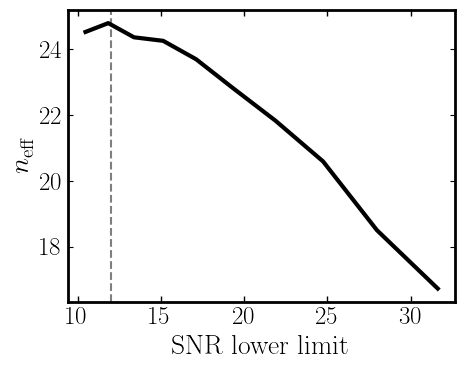

In [120]:
fname = 'sum_n1_p1_3/snrcuts.fits'
out = pyfits.getdata(fname)
snr = out[0]
std = out[1]
neff=(0.26/(np.sqrt((0.2*7000/60/2.)**2.*np.pi)*std))**2.
plt.close()
fig,ax= plt.subplots(nrows=1, ncols=1, sharex=True, figsize=(5,4))
ax.plot(snr, neff, color='black')
ax.set_xlabel('SNR lower limit')
ax.set_ylabel(r'$n_\mathrm{eff}$')
ax.axvline(x = 12, color = 'black', ls='--', lw=1.5, alpha=0.5)
fig.subplots_adjust(bottom=0.15)
fig.savefig('./plots/neff_snr.pdf')